In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
data=pd.read_csv('Position_Salaries.csv')

In [15]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [16]:
data.isnull().any

<bound method DataFrame.any of    Position  Level  Salary
0     False  False   False
1     False  False   False
2     False  False   False
3     False  False   False
4     False  False   False
5     False  False   False
6     False  False   False
7     False  False   False
8     False  False   False
9     False  False   False>

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [18]:
#plt.boxplot(data['Salary'])  # one outlier is present

In [19]:
# remove outlier

#data.drop(9,axis=0,inplace=True)

In [22]:
x=data.iloc[:,1:2].values # ignoring position 
y=data.iloc[:,2].values

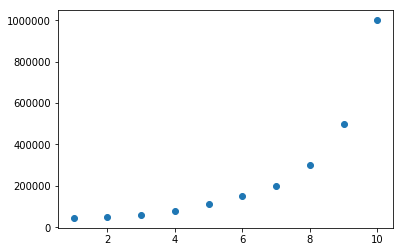

In [24]:
plt.scatter(x,y)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3) 
# increasing degree of polnomial
# if increase degree=4, the predicted red line exactly fits data points..but this is overfitting of data

In [26]:
x_poly=poly.fit_transform(x)
x_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
pr=LinearRegression()

In [29]:
pr.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
y_pred=pr.predict(x_poly)
y_pred

array([ 14902.09790211,  78759.90675991,  94960.37296037,  88223.77622377,
        83270.3962704 , 104820.51282051, 177594.40559441, 326312.35431236,
       575694.63869464, 950461.53846153])

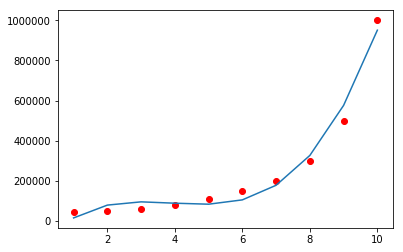

In [31]:
plt.scatter(x,y,color='red')
plt.plot(x,y_pred)
plt.show()